In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
aumento_cupo=pd.read_csv("/content/drive/My Drive/Desafío Itaú/aumento_cupo.csv")
cartola=pd.read_csv("/content/drive/My Drive/Desafío Itaú/cartola.csv")
predicciones=pd.read_csv("/content/drive/My Drive/Desafío Itaú/predicciones_202209.csv")
saldos_consolidados=pd.read_csv("/content/drive/My Drive/Desafío Itaú/saldos_consolidados.csv")

#EDA

In [ ]:
df_periodos=pd.DataFrame(index=[0])
df_periodos['202202']=aumento_cupo[aumento_cupo['Periodo']==202202]['flag_aumento'].count()
df_periodos['202203']=aumento_cupo[aumento_cupo['Periodo']==202203]['flag_aumento'].count()
df_periodos['202204']=aumento_cupo[aumento_cupo['Periodo']==202204]['flag_aumento'].count()
df_periodos['202205']=aumento_cupo[aumento_cupo['Periodo']==202205]['flag_aumento'].count()
df_periodos['202206']=aumento_cupo[aumento_cupo['Periodo']==202206]['flag_aumento'].count()
df_periodos['202207']=aumento_cupo[aumento_cupo['Periodo']==202207]['flag_aumento'].count()
df_periodos['202208']=aumento_cupo[aumento_cupo['Periodo']==202208]['flag_aumento'].count()

In [ ]:
df_periodos=df_periodos.T
df_periodos.columns=['Aumento cupo cantidad']

In [ ]:
df_periodos

,Aumento cupo cantidad
202202,6942
202203,5333
202204,3800
202205,4711
202206,3783
202207,4636
202208,3812


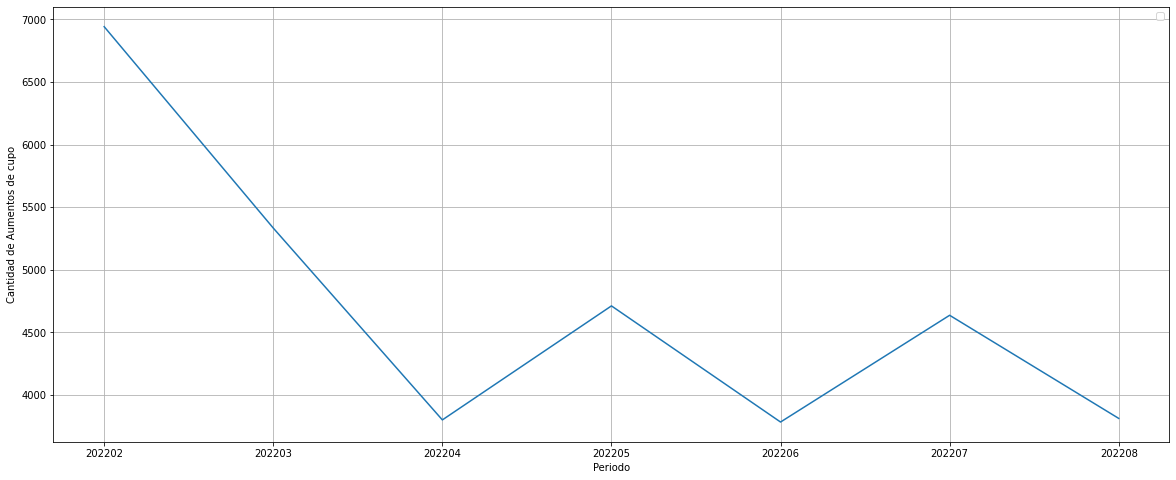

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(df_periodos)
plt.grid()
plt.legend()
plt.xlabel('Periodo')
plt.ylabel('Cantidad de Aumentos de cupo')
plt.show()

In [ ]:
pd.set_option('display.max_columns', None)
cartola

In [ ]:
cartola['PORCENTAJE_UTILIDAD']=cartola.apply(lambda x: x['DEPOSITO_MONTO']/x['COMPRAS_MONTO']*100 if x['COMPRAS_MONTO']!=0 else 0,axis=1)
cartola['PROCENTAJE_COMPRA']=cartola.apply(lambda x: x['COMPRAS_MONTO']/x['COMPRAS_OP']*100 if x['COMPRAS_OP']!=0 else 0,axis=1)
cartola['PORCENTAJE_DEPOSITO']=cartola.apply(lambda x: x['DEPOSITO_MONTO']/x['DEPOSITO_OP']*100 if x['DEPOSITO_OP']!=0 else 0, axis=1)
cartola['PORCENTAJE_CHEQUE']=cartola.apply(lambda x: x['CHEQUE_MONTO']/x['CHEQUE_OP']*100 if x['CHEQUE_OP']!=0 else 0,axis=1)
cartola['PORCENTAJE_CUENTAS']=cartola.apply(lambda x: x['PAGOCUENTAS_MONTO']/x['PAGOCUENTAS_OP']*100 if x['PAGOCUENTAS_OP']!=0 else 0,axis=1)
cartola['PORCENTAJE_TRANSFERENCIAS']=cartola.apply(lambda x: x['TRANSFERENCIAS_MONTO']/x['TRANSERENCIAS_OP']*100 if x['TRANSERENCIAS_OP']!=0 else 0,axis=1)
cartola['PORCENTAJE_VALEVISTA']=cartola.apply(lambda x: x['VALEVISTA_MONTO']/x['VALEVISTA_OP']*100 if x['VALEVISTA_OP']!=0 else 0,axis=1)
cartola['PORCENTAJE_TOTALABONO']=cartola.apply(lambda x: x['TOTALABONO_MONTO']/x['TOTALABONO_OP']*100 if x['TOTALABONO_OP']!=0 else 0,axis=1)
cartola['PORCENTAJE_PAGOLCRED']=cartola.apply(lambda x: x['PAGOLCRED_MONTO']/x['PAGOLCRED_OP']*100 if x['PAGOLCRED_OP']!=0 else 0,axis=1)
cartola['PORCENTAJE_CONSUMO']=cartola.apply(lambda x: x['PAGO_CONSUMO_MONTO']/x['PAGO_CONSUMO_OP']*100 if x['PAGO_CONSUMO_OP']!=0 else 0,axis=1)
cartola['PORCENTAJE_HIPOTECARIO']=cartola.apply(lambda x: x['PAGO_HIPOTECARIO_MONTO']/x['PAGO_HIPOTECARIO_OP']*100 if x['PAGO_HIPOTECARIO_OP']!=0 else 0,axis=1)
cartola['PORCENTAJE_RENE']=cartola.apply(lambda x: x['PAGO_RENE_MONTO']/x['PAGO_RENE_OP']*100 if x['PAGO_RENE_OP']!=0 else 0,axis=1)
cartola['PORCENTAJE_CAE']=cartola.apply(lambda x: x['PAGO_CAE_MONTO']/x['PAGO_CAE_OP']*100 if x['PAGO_CAE_OP']!=0 else 0,axis=1)

In [ ]:
saldos_consolidados=pd.concat([saldos_consolidados,pd.get_dummies(saldos_consolidados['SegmentoRiesgo'])],axis=1)
saldos_consolidados=pd.concat([saldos_consolidados,pd.get_dummies(saldos_consolidados[['IIR_CLASE','DIGITAL_CLASE']])],axis=1)

In [ ]:
pd.set_option('display.max_columns', None)
saldos_consolidados

,Edad,SexoId,Segmento,RentaAltamira,RentaEstimada,Q_Prods,SegmentoRiesgo,CCTE_Q_OP,CCTE_SALDO_CLP,CCUOTA_Q_OP,CCUOTA_MONTO_SOLICITADO,CCUOTA_SALDO_CAPITAL,CRENEG_Q_OP,CRENEG_MONTO_SOLICITADO,CRENEG_SALDO_CAPITAL,DAP_Q_OP,DAP_SALDO_CLP,FFMM_Q_OP,FFMM_SALDO_PESOS,HIPO_Q_OP,HIPO_SALDO_CLP,LCRED_Q_OP,LCRED_CUPO,LCRED_SALDO_CLP,SEG_Q_OP,TC_Q_OP,TC_CUPO,TC_SALDO_CLP,GIROATM_Q_OP_MES,GIROATM_MONTO_MES_CLP,COMPRADEB_Q_OP_MES,COMPRADEB_MONTO_MES_CLP,AVNC_TC_Q_OP_MES,AVNC_TC_MONTO_MES_CLP,COMPRA_TC_Q_OP_MES,COMPRA_TC_MONTO_MES_CLP,SBIF_COMER_MONTO_CLP,SBIF_CONSUMO_MONTO_CLP,SBIF_Q_ACREED_CONSUMO,SBIF_HP_MONTO_CLP,SBIF_LDISP_MONTO_CLP,Periodo,PAS_Q_OP,CVISTA_Q_OP,CVISTA_SALDO_CLP,CVISTA_SALDO_AVG_CLP,PAT_Q_OP,PAC_Q_OP,IIR_CLASE,DIGITAL_CLASE,id,a,b,c,d,e,f,g,h,i,j,k,l,m,n,IIR_CLASE_C1,IIR_CLASE_C2,IIR_CLASE_C3,IIR_CLASE_C4,IIR_CLASE_C5,IIR_CLASE_C6,IIR_CLASE_C7,DIGITAL_CLASE_C1,DIGITAL_CLASE_C2,DIGITAL_CLASE_C3,DIGITAL_CLASE_C5,DIGITAL_CLASE_C6,DIGITAL_CLASE_C7
0,74,0,1,685.667045,NaN,9,a,1,10586.322727,2,9121.155284,6676.517955,0,0.0,0.0,6,29334.275000,3,13256.005682,1,4339.601614,0,0.000000,0.000000,5,1,1136.363636,609.786364,0,0.000000,21,763.687500,0,0.0,0,0.000000,1486.363636,9037.500000,2,5456.818182,1229.545455,202208,0,1,0.000000,0.000000,0,1,C5,C7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,68,1,2,0.000000,NaN,4,a,1,316.987500,0,0.000000,0.000000,0,0.0,0.0,0,0.000000,0,0.000000,0,0.000000,1,1136.363636,-0.000000,2,2,6818.181818,44.465909,0,0.000000,0,0.000000,0,0.0,1,3.561364,0.000000,845.454545,1,4692.045455,25265.909091,202208,0,0,0.000000,0.000000,0,0,NaN,NaN,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,74,1,1,511.363636,568.181818,2,b,0,0.000000,0,0.000000,0.000000,0,0.0,0.0,0,0.000000,2,5429.551136,0,0.000000,0,0.000000,0.000000,0,1,1022.727273,0.000000,0,0.000000,0,0.000000,0,0.0,0,0.000000,0.000000,0.000000,0,5214.772727,3513.636364,202208,0,0,0.000000,0.000000,0,0,NaN,NaN,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,80,0,2,1704.545455,1704.545455,4,a,1,0.000000,0,0.000000,0.000000,0,0.0,0.0,0,0.000000,0,0.000000,0,0.000000,1,4545.454545,4351.481818,1,0,0.000000,0.000000,0,0.000000,0,0.000000,0,0.0,0,0.000000,0.000000,7285.227273,2,0.000000,12387.500000,202208,0,1,0.000000,0.000000,0,0,NaN,NaN,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,77,1,3,0.001136,1704.545455,4,a,1,0.000000,0,0.000000,0.000000,0,0.0,0.0,0,0.000000,0,0.000000,0,0.000000,1,1136.363636,635.146591,2,1,7954.545455,4355.707955,2,227.272727,12,141.059091,0,0.0,88,4539.076261,0.000000,2731.818182,2,0.000000,15267.045455,202208,0,0,0.000000,0.000000,0,5,C4,C6,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1583875,45,1,6,6986.818182,NaN,4,c,1,95399.531818,0,0.000000,0.000000,0,0.0,0.0,0,0.000000,0,0.000000,0,0.000000,1,1306.818182,-0.000000,3,1,13636.363636,10061.073864,1,56.818182,0,0.000000,0,0.0,31,1389.360227,0.000000,11496.590909,1,0.000000,18523.863636,202202,0,0,0.000000,0.000000,0,0,NaN,C7,231114,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1583876,50,1,3,4013.506818,NaN,4,b,1,9120.090909,0,0.000000,0.000000,0,0.0,0.0,0,0.000000,0,0.000000,0,0.000000,1,1136.363636,-0.000000,3,1,2272.727273,489.461364,1,113.636364,0,0.000000,0,0.0,9,422.813636,0.000000,486.363636,1,0.000000,5411.363636,202202,0,0,0.000000,0.000000,1,0,NaN,C6,231115,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1583877,43,1,6,8181.818182,NaN,4,a,1,61526.118182,0,0.000000,0.000000,0,0.0,0.0,0,0.000000,0,0.000000,0,0.000000,1,5681.818182,-0.000000,3,2,14204.545455,3925.940909,0,0.000000,5,110.729545,0,0.0,38,3451.839773,0.000000,3495.454545,1,0.000000,26265.909091,202202,0,0,0.000000,0.000000,0,0,NaN,

In [ ]:
saldos_consolidados['PORCENTAJE_CUENTA']=saldos_consolidados.apply(lambda x:x['CCTE_SALDO_CLP']/x['CCTE_Q_OP']*100 if x['CCTE_Q_OP']!=0 else 0,axis=1)
saldos_consolidados['PORCENTAJE_CREDITO']=saldos_consolidados.apply(lambda x:x['CCUOTA_MONTO_SOLICITADO']/x['CCUOTA_Q_OP']*100 if x['CCUOTA_Q_OP']!=0 else 0,axis=1)
saldos_consolidados['PORCENTAJE_CRENEG']=saldos_consolidados.apply(lambda x:x['CRENEG_MONTO_SOLICITADO']/x['CRENEG_Q_OP']*100 if x['CRENEG_Q_OP']!=0 else 0,axis=1)
saldos_consolidados['PORCENTAJE_DAP']=saldos_consolidados.apply(lambda x:x['DAP_SALDO_CLP']/x['DAP_Q_OP']*100 if x['DAP_Q_OP']!=0 else 0,axis=1)
saldos_consolidados['PORCENTAJE_FFMM']=saldos_consolidados.apply(lambda x:x['FFMM_SALDO_PESOS']/x['FFMM_Q_OP']*100 if x['FFMM_Q_OP']!=0 else 0,axis=1)
saldos_consolidados['PORCENTAJE_HIPO']=saldos_consolidados.apply(lambda x:x['HIPO_SALDO_CLP']/x['HIPO_Q_OP']*100 if x['HIPO_Q_OP']!=0 else 0,axis=1)
saldos_consolidados['PORCENTAJE_LCRED']=saldos_consolidados.apply(lambda x:x['LCRED_CUPO']/x['LCRED_Q_OP']*100 if x['LCRED_Q_OP']!=0 else 0,axis=1)
saldos_consolidados['PORCENTAJE_CUPO']=saldos_consolidados.apply(lambda x:x['TC_CUPO']/x['TC_Q_OP']*100 if x['TC_Q_OP']!=0 else 0,axis=1)
saldos_consolidados['PORCENTAJE_GIROS']=saldos_consolidados.apply(lambda x:x['GIROATM_MONTO_MES_CLP']/x['GIROATM_Q_OP_MES']*100 if x['GIROATM_Q_OP_MES']!=0 else 0,axis=1)
saldos_consolidados['PORCENTAJE_COMPRADEB']=saldos_consolidados.apply(lambda x:x['COMPRADEB_MONTO_MES_CLP']/x['COMPRADEB_Q_OP_MES']*100 if x['COMPRADEB_Q_OP_MES']!=0 else 0,axis=1)
saldos_consolidados['PORCENTAJE_AVNC']=saldos_consolidados.apply(lambda x:x['AVNC_TC_MONTO_MES_CLP']/x['AVNC_TC_Q_OP_MES']*100 if x['AVNC_TC_Q_OP_MES']!=0 else 0,axis=1)
saldos_consolidados['PORCENTAJE_COMPRATC']=saldos_consolidados.apply(lambda x:x['COMPRA_TC_MONTO_MES_CLP']/x['COMPRA_TC_Q_OP_MES']*100 if x['COMPRA_TC_Q_OP_MES']!=0 else 0,axis=1)
saldos_consolidados['PORCENTAJE_CVISTA']=saldos_consolidados.apply(lambda x:x['CVISTA_SALDO_AVG_CLP']/x['CVISTA_SALDO_CLP']*100 if x['CVISTA_SALDO_CLP']!=0 else 0,axis=1)

In [ ]:
saldos_consolidados=saldos_consolidados.drop(columns=['SegmentoRiesgo','IIR_CLASE','DIGITAL_CLASE'])

In [ ]:
septiembre=pd.DataFrame([0]*len(saldos_consolidados),columns=[202209])

In [ ]:
saldos_consolidados=pd.concat([saldos_consolidados,pd.get_dummies(saldos_consolidados['Periodo']),septiembre],axis=1)

In [ ]:
df=cartola.merge(aumento_cupo,how='left',on=['id','Periodo'])

In [ ]:
df

,COMPRAS_MONTO,COMPRAS_OP,DEPOSITO_MONTO,DEPOSITO_OP,GIROCAJA_MONTO,GIROCAJA_OP,CHEQUE_MONTO,CHEQUE_OP,PAGOCUENTAS_MONTO,PAGOCUENTAS_OP,PAGOTC_MONTO,PAGOTC_OP,PAS_MONTO,TRANSFERENCIAS_MONTO,TRANSERENCIAS_OP,VALEVISTA_MONTO,VALEVISTA_OP,TOTALABONO_MONTO,TOTALABONO_OP,Periodo,PAGOLCRED_MONTO,PAGOLCRED_OP,PAGOAUTCUENTAS_MONTO,PAGOAUTTC_MONTO,PAGO_CONSUMO_MONTO,PAGO_CONSUMO_OP,PAGO_HIPOTECARIO_MONTO,PAGO_HIPOTECARIO_OP,PAGO_RENE_MONTO,PAGO_RENE_OP,PAGO_CAE_MONTO,PAGO_CAE_OP,id,PORCENTAJE_UTILIDAD,PROCENTAJE_COMPRA,PORCENTAJE_DEPOSITO,PORCENTAJE_CHEQUE,PORCENTAJE_CUENTAS,PORCENTAJE_TRANSFERENCIAS,PORCENTAJE_VALEVISTA,PORCENTAJE_TOTALABONO,PORCENTAJE_PAGOLCRED,PORCENTAJE_CONSUMO,PORCENTAJE_HIPOTECARIO,PORCENTAJE_RENE,PORCENTAJE_CAE,flag_aumento
0,763.687500,21.0,1409.090909,4.0,0.0,0.0,159.631818,2.0,364.943182,7.0,476.502273,1.0,0.0,2017.272727,31.0,0.0,0.0,3794.363636,16.0,202208.0,0.000000,0.0,7.986364,158.373864,195.376136,2.0,416.306818,1.0,0.0,0.0,0.0,0.0,1,184.511454,3636.607143,35227.272727,7981.590909,5213.474026,6507.331378,0.0,23714.772727,0.000000,9768.806818,41630.681818,0,0,NaN
1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,306.818182,1.0,202208.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,30681.818182,0.000000,0.000000,0.000000,0,0,NaN
2,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1194.681818,6.0,0.000000,0.0,0.0,170.454545,1.0,0.0,0.0,4328.512500,18.0,202208.0,1392.870455,3.0,0.000000,59.948864,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,4,0.000000,0.000000,0.000000,0.000000,19911.363636,17045.454545,0.0,24047.291667,46429.015152,0.000000,0.000000,0,0,NaN
3,141.059091,12.0,0.000000,0.0,0.0,0.0,0.000000,0.0,87.932955,1.0,1345.800000,1.0,0.0,1480.392045,4.0,0.0,0.0,3067.114773,5.0,202208.0,53.822727,1.0,257.640909,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,5,0.000000,1175.492424,0.000000,0.000000,8793.295455,37009.801136,0.0,61342.295455,5382.272727,0.000000,0.000000,0,0,NaN
4,89.772727,9.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,775.528409,1.0,0.0,5365.601136,7.0,0.0,0.0,6811.831818,9.0,202208.0,934.070455,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,6,0.000000,997.474747,0.000000,0.000000,0.000000,76651.444805,0.0,75687.020202,93407.045455,0.000000,0.000000,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1481991,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,50.861364,1.0,1136.363636,1.0,0.0,674.420455,6.0,0.0,0.0,148.295455,3.0,202202.0,0.000000,0.0,7.461364,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,231114,0.000000,0.000000,0.000000,0.000000,5086.136364,11240.340909,0.0,4943.181818,0.000000,0.000000,0.000000,0,0,NaN
1481992,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,101.951136,1.0,0.0,1122.068182,5.0,0.0,0.0,0.000000,0.0,202202.0,0.000000,0.0,7.461364,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,231115,0.000000,0.000000,0.000000,0.000000,0.000000,22441.363636,0.0,0.000000,0.000000,0.000000,0.000000,0,0,NaN
1481993,110.729545,5.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,1690.215909,7.0,0.0,0.0,0.000000,0.0,202202.0,0.000000,0.0,7.461364,1688.414773,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,231116,0.000000,2214.590909,0.000000,0.000000,0.000000,24145.941558,0.0,0.000000,0.000000,0.000000,0.000000,0,0,NaN
1481994,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,562.748864,2.0,0.0,875.000000,1.0,0.0,0.0,1443.181818,2.0,202202.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,231117,0.000000,0.000000,0.000000,0.000000,0.000000,87500.000000,0.0,72159.090909,0.000000,0.000000,0.000000,0,0,NaN


In [ ]:
df=df.merge(saldos_consolidados,how='inner',on=['id','Periodo'])

In [ ]:
df['flag_aumento']=df['flag_aumento'].replace(np.nan,0)

In [ ]:
df['RentaEstimada']=df['RentaEstimada'].replace(np.nan,df['RentaEstimada'].mean())

In [ ]:
df

In [ ]:
df['RentaEstimada']=df['RentaEstimada'].replace(np.nan,df['RentaEstimada'].median())

In [ ]:
df

,COMPRAS_MONTO,COMPRAS_OP,DEPOSITO_MONTO,DEPOSITO_OP,GIROCAJA_MONTO,GIROCAJA_OP,CHEQUE_MONTO,CHEQUE_OP,PAGOCUENTAS_MONTO,PAGOCUENTAS_OP,PAGOTC_MONTO,PAGOTC_OP,PAS_MONTO,TRANSFERENCIAS_MONTO,TRANSERENCIAS_OP,VALEVISTA_MONTO,VALEVISTA_OP,TOTALABONO_MONTO,TOTALABONO_OP,Periodo,PAGOLCRED_MONTO,PAGOLCRED_OP,PAGOAUTCUENTAS_MONTO,PAGOAUTTC_MONTO,PAGO_CONSUMO_MONTO,PAGO_CONSUMO_OP,PAGO_HIPOTECARIO_MONTO,PAGO_HIPOTECARIO_OP,PAGO_RENE_MONTO,PAGO_RENE_OP,PAGO_CAE_MONTO,PAGO_CAE_OP,id,PORCENTAJE_UTILIDAD,PROCENTAJE_COMPRA,PORCENTAJE_DEPOSITO,PORCENTAJE_CHEQUE,PORCENTAJE_CUENTAS,PORCENTAJE_TRANSFERENCIAS,PORCENTAJE_VALEVISTA,PORCENTAJE_TOTALABONO,PORCENTAJE_PAGOLCRED,PORCENTAJE_CONSUMO,PORCENTAJE_HIPOTECARIO,PORCENTAJE_RENE,PORCENTAJE_CAE,flag_aumento,Edad,SexoId,Segmento,RentaAltamira,RentaEstimada,Q_Prods,CCTE_Q_OP,CCTE_SALDO_CLP,CCUOTA_Q_OP,CCUOTA_MONTO_SOLICITADO,CCUOTA_SALDO_CAPITAL,CRENEG_Q_OP,CRENEG_MONTO_SOLICITADO,CRENEG_SALDO_CAPITAL,DAP_Q_OP,DAP_SALDO_CLP,FFMM_Q_OP,FFMM_SALDO_PESOS,HIPO_Q_OP,HIPO_SALDO_CLP,LCRED_Q_OP,LCRED_CUPO,LCRED_SALDO_CLP,SEG_Q_OP,TC_Q_OP,TC_CUPO,TC_SALDO_CLP,GIROATM_Q_OP_MES,GIROATM_MONTO_MES_CLP,COMPRADEB_Q_OP_MES,COMPRADEB_MONTO_MES_CLP,AVNC_TC_Q_OP_MES,AVNC_TC_MONTO_MES_CLP,COMPRA_TC_Q_OP_MES,COMPRA_TC_MONTO_MES_CLP,SBIF_COMER_MONTO_CLP,SBIF_CONSUMO_MONTO_CLP,SBIF_Q_ACREED_CONSUMO,SBIF_HP_MONTO_CLP,SBIF_LDISP_MONTO_CLP,PAS_Q_OP,CVISTA_Q_OP,CVISTA_SALDO_CLP,CVISTA_SALDO_AVG_CLP,PAT_Q_OP,PAC_Q_OP,a,b,c,d,e,f,g,h,i,j,k,l,m,n,IIR_CLASE_C1,IIR_CLASE_C2,IIR_CLASE_C3,IIR_CLASE_C4,IIR_CLASE_C5,IIR_CLASE_C6,IIR_CLASE_C7,DIGITAL_CLASE_C1,DIGITAL_CLASE_C2,DIGITAL_CLASE_C3,DIGITAL_CLASE_C5,DIGITAL_CLASE_C6,DIGITAL_CLASE_C7,PORCENTAJE_CUENTA,202202,202203,202204,202205,202206,202207,202208,202209
0,763.687500,21.0,1409.090909,4.0,0.0,0.0,159.631818,2.0,364.943182,7.0,476.502273,1.0,0.0,2017.272727,31.0,0.0,0.0,3794.363636,16.0,202208.0,0.000000,0.0,7.986364,158.373864,195.376136,2.0,416.306818,1.0,0.0,0.0,0.0,0.0,1,184.511454,3636.607143,35227.272727,7981.590909,5213.474026,6507.331378,0.0,23714.772727,0.000000,9768.806818,41630.681818,0,0,0.0,74,0,1,685.667045,1022.727273,9,1,10586.322727,2,9121.155284,6676.517955,0,0.0,0.0,6,29334.275000,3,13256.005682,1,4339.601614,0,0.000000,0.000000,5,1,1136.363636,609.786364,0,0.000000,21,763.687500,0,0.0,0,0.000000,1486.363636,9037.500000,2,5456.818182,1229.545455,0,1,0.000000,0.000000,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,86.159808,0,0,0,0,0,0,1,0
1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,306.818182,1.0,202208.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,30681.818182,0.000000,0.000000,0.000000,0,0,0.0,68,1,2,0.000000,1022.727273,4,1,316.987500,0,0.000000,0.000000,0,0.0,0.0,0,0.000000,0,0.000000,0,0.000000,1,1136.363636,-0.000000,2,2,6818.181818,44.465909,0,0.000000,0,0.000000,0,0.0,1,3.561364,0.000000,845.454545,1,4692.045455,25265.909091,0,0,0.000000,0.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0,0,0,0,0,1,0
2,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1194.681818,6.0,0.000000,0.0,0.0,170.454545,1.0,0.0,0.0,4328.512500,18.0,202208.0,1392.870455,3.0,0.000000,59.948864,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,4,0.000000,0.000000,0.000000,0.000000,19911.363636,17045.454545,0.0,24047.291667,46429.015152,0.000000,0.000000,0,0,0.0,80,0,2,1704.545455,1704.545455,4,1,0.000000,0,0.000000,0.000000,0,0.0,0.0,0,0.000000,0,0.000000,0,0.000000,1,4545.454545,4351.481818,1,0,0.000000,0.000000,0,0.000000,0,0.000000,0,0.0,0,0.000000,0.000000,7285.227273,2,0.000000,12387.500000,0,1,0.000000,0.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0,0,0,0,0,1,0
3,141.059091,12.0,0.000000,0.0,0.0,0.0,0.000000,0.0,87.932955,1.0,1345.800000,1.0,0.0,1480.392045,4.0,0.0,0.0,3067.114773,5.0,202208.0,53.822727,1.0,257.640909,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,5,

In [ ]:
df.to_csv("/content/drive/My Drive/Desafío Itaú/df_preliminar.csv")

In [ ]:
df=pd.read_csv("/content/drive/My Drive/Desafío Itaú/df_preliminar.csv")

In [ ]:
df=df.drop(columns=['Unnamed: 0'])

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)

In [ ]:
cont_vars = list(newdf.columns)
def outliers_visual(data):
    i = 0
    plt.figure(figsize=(50, 500))
    for col in cont_vars:
        i += 1
        plt.subplot(int(newdf.shape[1]/4)*2+2, 4, i)
        sns.boxplot(x=data[col])
        plt.ylabel(col,fontsize=15)
        i += 1
        plt.subplot(int(newdf.shape[1]/4)*2+2, 4, i)
        plt.hist(data[col],bins=100)
        plt.ylabel(col,fontsize=15)
    plt.show()
outliers_visual(newdf)

<Figure size 3600x36000 with 0 Axes>

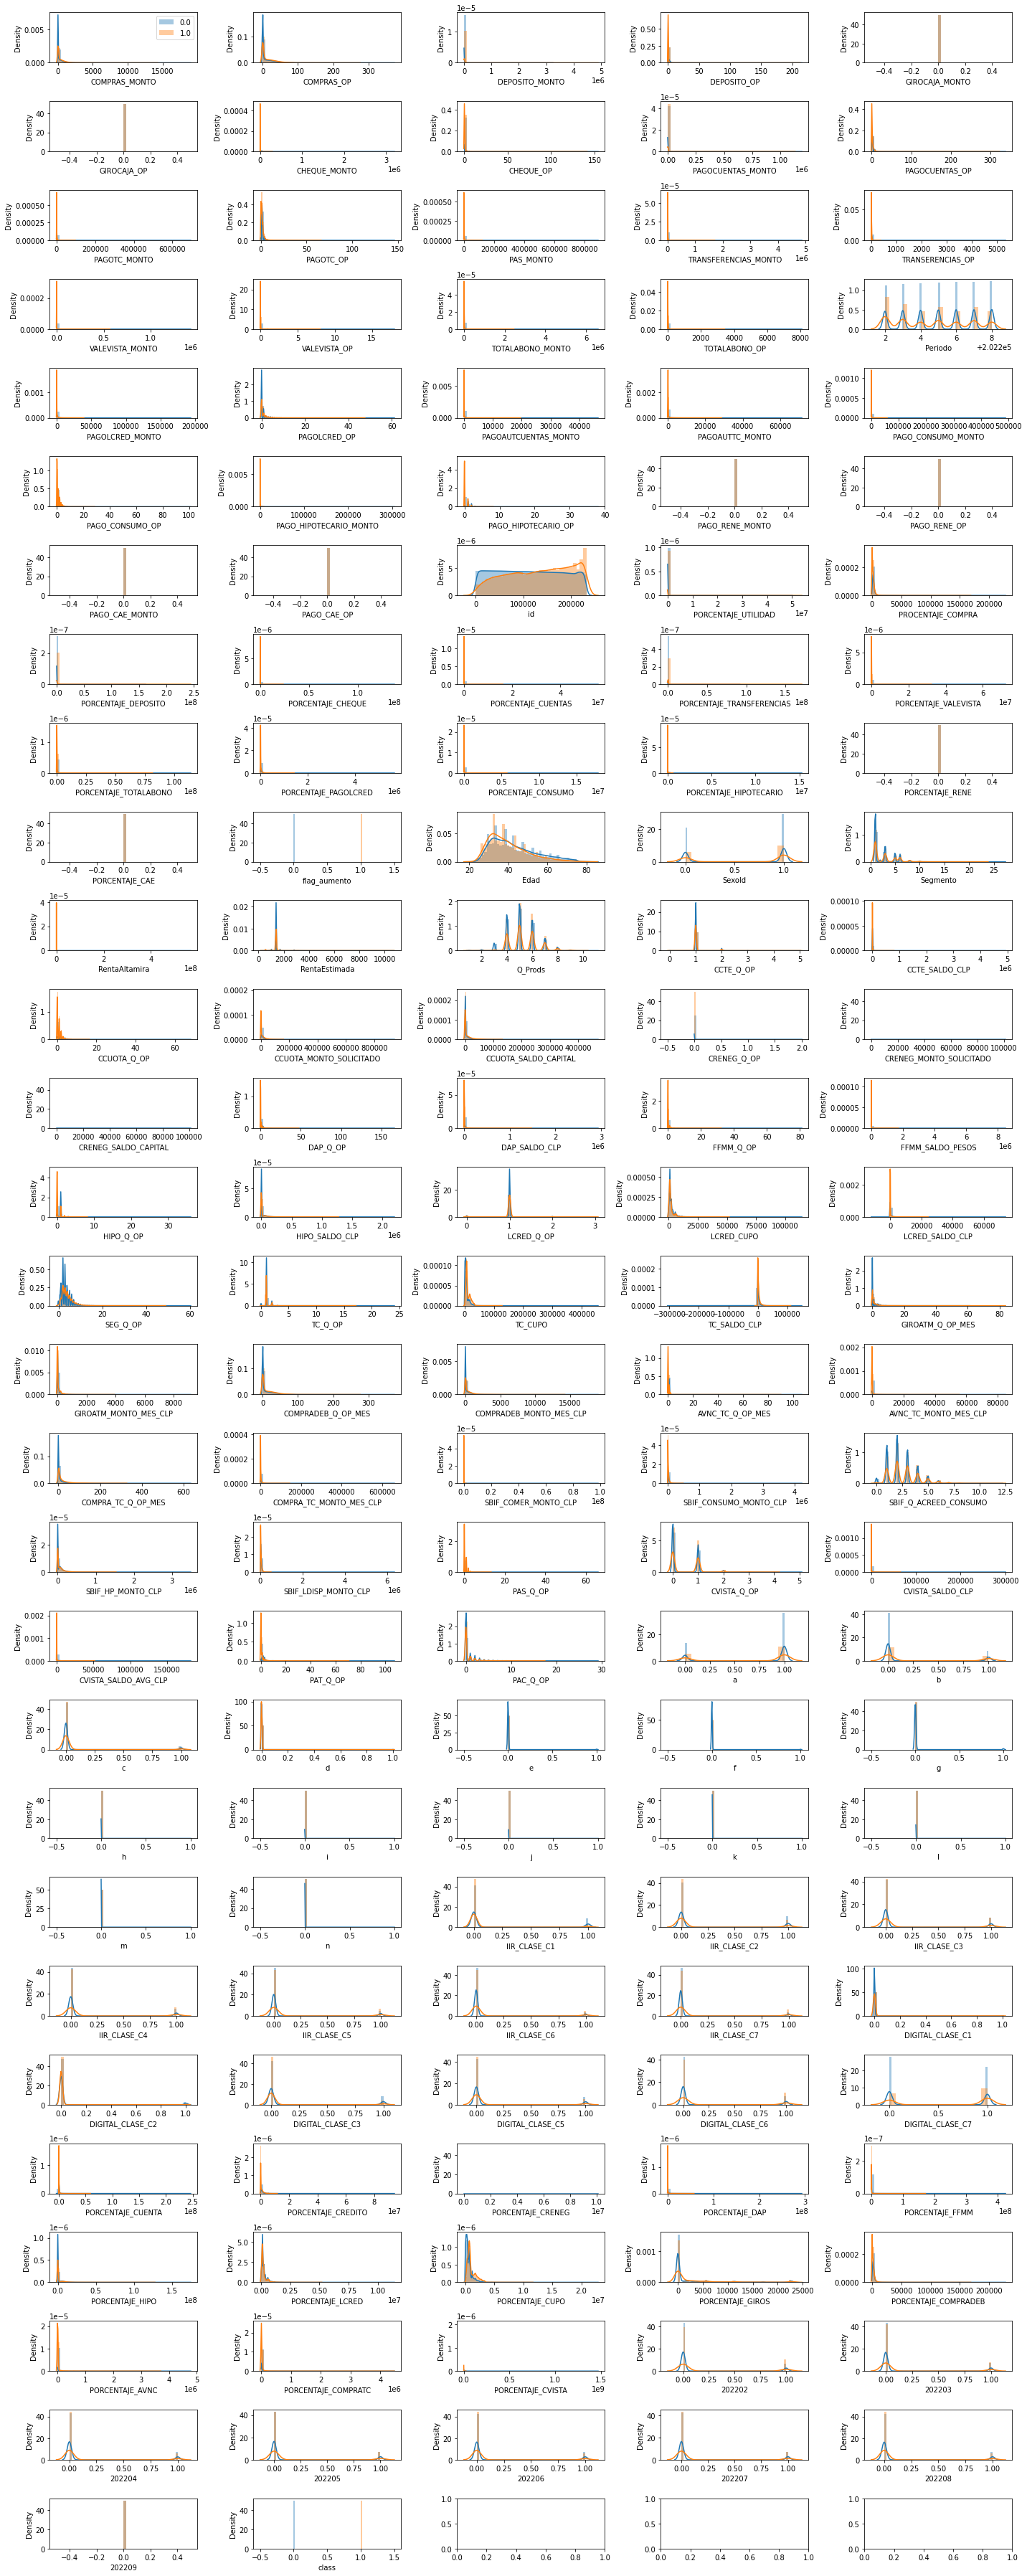

In [ ]:
from warnings import filterwarnings 
filterwarnings("ignore")
df_all = pd.DataFrame(newdf)
df_all['class'] = newdf['flag_aumento']
classes=np.unique(newdf['flag_aumento'].values)
plt.figure(figsize=(50, 500))
fig, axes = plt.subplots(figsize=(20,50), nrows=int(newdf.shape[1]/5+1), ncols=5)
for i, column in enumerate(newdf.columns):
    for class_ in classes:
      target = df_all.loc[df_all['class'] == class_]
      sns.distplot(target[column], hist=True, rug=False, kde=True, ax=axes[i//5,i%5],label=class_)
      if i==0:
        axes[0,0].legend()

plt.tight_layout()
plt.show()

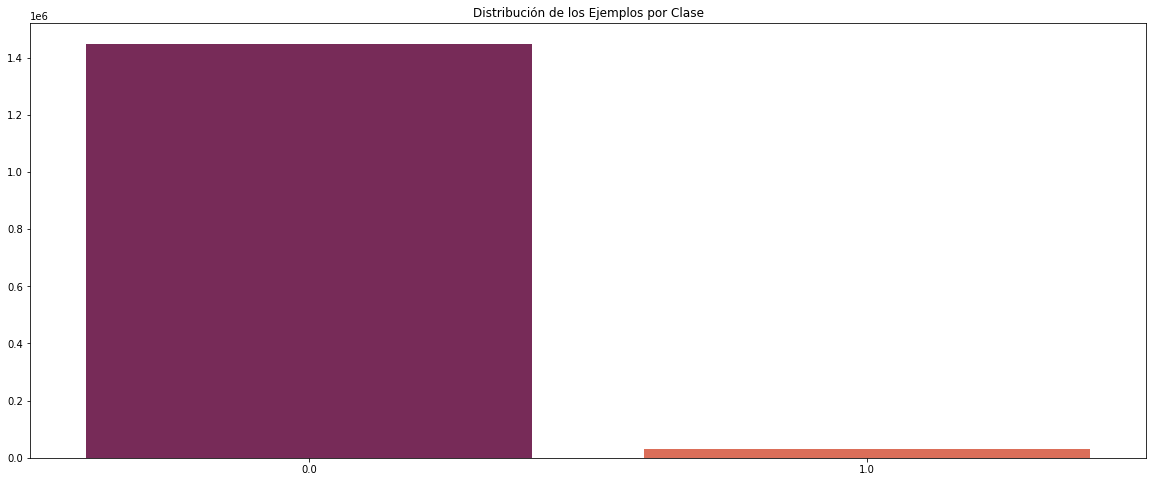

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
clases, frecuencia = np.unique(df['flag_aumento'], return_counts=True)

fig, ax = plt.subplots(figsize=(20,8),nrows=1)
p = sns.barplot(x=clases, y=frecuencia, palette="rocket",ax=ax)
ax.set_title('Distribución de los Ejemplos por Clase')
plt.show()

#Modelo

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer,StandardScaler
np.random.seed(1)
X=df.drop(columns=['flag_aumento','Periodo']).values
y=df['flag_aumento'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1,shuffle=True)
scaler=PowerTransformer()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [ ]:
scaler2=StandardScaler()
X_train=scaler2.fit_transform(X_train)
X_test=scaler2.transform(X_test)

In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
# A dictionary object containing key-value pairs of both classes and # their weights
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}

In [ ]:
class_weights_dict

{0: 0.5110927343624696, 1: 23.03727456467662}

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
model=DecisionTreeClassifier()
param_grid={'max_depth':[i for i in range(30,70,5)],'random_state':[1],'max_features':['auto','sqrt', 'log2'],'class_weight':[class_weights_dict]}
DT_cv=GridSearchCV(model,param_grid,verbose=2,scoring='precision')
DT_cv.fit(X_train,y_train)

In [ ]:
DT_cv.best_params_

In [ ]:
predict=DT_cv.best_estimator_.predict(X_test)

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
precision_score(predict,y_test)

In [ ]:
precision_score(DT_cv.best_estimator_.predict(X_train),y_train)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(class_weight= {0: 0.5110927343624696, 1: 23.03727456467662},max_depth=18,max_features=None,random_state= 1)
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.5110927343624696,
                                     1: 23.03727456467662},
                       max_depth=18, random_state=1)

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
precision_score(model.predict(X_train),y_train)

0.9884950248756219

In [ ]:
precision_score(model.predict(X_test),y_test)

0.6535789791603746

In [ ]:
roc_auc_score(model.predict(X_test),y_test)

0.53937427762454

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(model.predict(X_test),y_test)

0.9552930299103769

In [ ]:
df_predict=pd.DataFrame(model.predict_proba(X_test))

In [ ]:
df_predict[0]=df_predict[0].apply(lambda x: 1 if x>0.5 else 0)
df_predict[1]=df_predict[1].apply(lambda x: 1 if x>0.5 else 0)

In [ ]:
predict=df_predict.idxmax(axis=1)

In [ ]:
predict[predict==1]

6         1
15        1
17        1
18        1
19        1
         ..
296324    1
296326    1
296338    1
296339    1
296341    1
Length: 56170, dtype: int64

In [ ]:
import pickle
pickle.dump(model, open('/content/drive/My Drive/Desafío Itaú/last_model_decision_tree.sav', 'wb'))

In [ ]:
import pickle
model=pickle.load(open(f'/content/drive/My Drive/Desafío Itaú/last_model_decision_tree.sav', 'rb'))

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
precision_score(model.predict(X_test),y_test)

0.7167019027484144

In [ ]:
df_predict=pd.DataFrame(model.predict(X_test))

In [ ]:
df_predict[0][df_predict[0]==1]

2         1.0
5         1.0
9         1.0
12        1.0
14        1.0
         ... 
296335    1.0
296338    1.0
296341    1.0
296346    1.0
296349    1.0
Name: 0, Length: 96265, dtype: float64

In [ ]:
roc_auc_score(model.predict(X_test),y_test)

0.5199627430493434

In [ ]:
accuracy_score(model.predict(X_test),y_test)

0.6848511229888781

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
model2=LogisticRegression()
param_grid={'class_weight':[class_weights_dict],'solver':['newton-cg', 'sag'],'random_state':[1]}
LR_cv=GridSearchCV(model2,param_grid,verbose=2,scoring='precision')
LR_cv.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END class_weight={0: 0.5110927343624696, 1: 23.03727456467662}, random_state=1, solver=newton-cg; total time=21.8min
[CV] END class_weight={0: 0.5110927343624696, 1: 23.03727456467662}, random_state=1, solver=newton-cg; total time=19.1min
[CV] END class_weight={0: 0.5110927343624696, 1: 23.03727456467662}, random_state=1, solver=newton-cg; total time=19.7min
[CV] END class_weight={0: 0.5110927343624696, 1: 23.03727456467662}, random_state=1, solver=newton-cg; total time=17.3min
[CV] END class_weight={0: 0.5110927343624696, 1: 23.03727456467662}, random_state=1, solver=newton-cg; total time=17.5min


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END class_weight={0: 0.5110927343624696, 1: 23.03727456467662}, random_state=1, solver=sag; total time= 3.6min


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END class_weight={0: 0.5110927343624696, 1: 23.03727456467662}, random_state=1, solver=sag; total time= 3.6min


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END class_weight={0: 0.5110927343624696, 1: 23.03727456467662}, random_state=1, solver=sag; total time= 3.6min


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END class_weight={0: 0.5110927343624696, 1: 23.03727456467662}, random_state=1, solver=sag; total time= 3.6min


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END class_weight={0: 0.5110927343624696, 1: 23.03727456467662}, random_state=1, solver=sag; total time= 3.6min


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'class_weight': [{0: 0.5110927343624696,
                                           1: 23.03727456467662}],
                         'random_state': [1], 'solver': ['newton-cg', 'sag']},
             scoring='precision', verbose=2)

In [ ]:
LR_cv.best_params_

{'class_weight': {0: 0.5110927343624696, 1: 23.03727456467662},
 'random_state': 1,
 'solver': 'newton-cg'}

In [ ]:
import pickle
pickle.dump(LR_cv.best_estimator_, open('/content/drive/My Drive/Desafío Itaú/last_model_logistic_regression.sav', 'wb'))

In [ ]:
import pickle
model=pickle.load(open(f'/content/drive/My Drive/Desafío Itaú/last_model_logistic_regression.sav', 'rb'))

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
precision_score(model.predict(X_test),y_test)

0.779371790999698

In [ ]:
df_predict=pd.DataFrame(model.predict(X_test))

In [ ]:
df_predict[0][df_predict[0]==1]

6         1.0
9         1.0
12        1.0
17        1.0
19        1.0
         ... 
296341    1.0
296343    1.0
296344    1.0
296346    1.0
296349    1.0
Name: 0, Length: 79363, dtype: float64

In [ ]:
roc_auc_score(LR_cv.best_estimator_.predict(X_test),y_test)

0.5291486217963756

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(LR_cv.best_estimator_.predict(X_test),y_test)

0.7446853741496599

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
model3=RandomForestClassifier()
param_grid={'max_depth':[i for i in range(8,12)],'max_features':['sqrt','log2'],'bootstrap':[True],'random_state':[1],'class_weight':['balanced']}
RF_cv=GridSearchCV(model3,param_grid,verbose=2,scoring='precision')
RF_cv.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END bootstrap=True, class_weight=balanced, max_depth=8, max_features=sqrt, random_state=1; total time= 6.5min
[CV] END bootstrap=True, class_weight=balanced, max_depth=8, max_features=sqrt, random_state=1; total time= 6.3min
[CV] END bootstrap=True, class_weight=balanced, max_depth=8, max_features=sqrt, random_state=1; total time= 6.3min
[CV] END bootstrap=True, class_weight=balanced, max_depth=8, max_features=sqrt, random_state=1; total time= 6.3min
[CV] END bootstrap=True, class_weight=balanced, max_depth=8, max_features=sqrt, random_state=1; total time= 6.3min
[CV] END bootstrap=True, class_weight=balanced, max_depth=8, max_features=log2, random_state=1; total time= 4.2min
[CV] END bootstrap=True, class_weight=balanced, max_depth=8, max_features=log2, random_state=1; total time= 4.2min
[CV] END bootstrap=True, class_weight=balanced, max_depth=8, max_features=log2, random_state=1; total time= 3.8min
[CV] END bootstrap=T

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'class_weight': ['balanced'],
                         'max_depth': [8, 9, 10, 11],
                         'max_features': ['sqrt', 'log2'],
                         'random_state': [1]},
             scoring='precision', verbose=2)

In [ ]:
RF_cv.best_params_

{'bootstrap': True,
 'class_weight': 'balanced',
 'max_depth': 11,
 'max_features': 'sqrt',
 'random_state': 1}

In [ ]:
RF_cv.best_estimator_.score(X_test,y_test)

0.9776650739660944

In [ ]:
import pickle
pickle.dump(RF_cv.best_estimator_, open('/content/drive/My Drive/Desafío Itaú/last_model_random_forest.sav', 'wb'))

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [ ]:
precision_score(RF_cv.best_estimator_.predict(X_train),y_train)

0.8641169154228856

In [ ]:
precision_score(RF_cv.predict(X_test),y_test)

0.779975838115373

In [ ]:
roc_auc_score(RF_cv.best_estimator_.predict(X_test),y_test)

0.5313160083269908

In [ ]:
accuracy_score(RF_cv.best_estimator_.predict(X_test),y_test)

0.7606663697224921

In [ ]:
import pickle
pickle.dump(RF_cv.best_estimator_, open('/content/drive/My Drive/Desafío Itaú/last_model_random_forest.sav', 'wb'))

Vemos overfitting por lo que entrenaremos el modelo con menos profundidad

In [ ]:
model4=RandomForestClassifier(max_depth=11,max_features='log2',bootstrap=True,random_state=1,class_weight='balanced')
model4.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       max_features='log2', random_state=1)

In [ ]:
precision_score(model4.predict(X_test),y_test)

0.7940199335548173

In [ ]:
roc_auc_score(model4.predict(X_test),y_test)

0.527381817437575

In [ ]:
accuracy_score(model4.predict(X_test),y_test)

0.7234369938451571

In [ ]:
import pickle
pickle.dump(model4, open('/content/drive/My Drive/Desafío Itaú/last_model_random_forest.sav', 'wb'))

In [ ]:
variables=np.flip(np.argsort(RF_cv.best_estimator_.feature_importances_))[:10]

In [ ]:
valor_variables=np.flip(np.sort(RF_cv.best_estimator_.feature_importances_))[:10]

In [ ]:
columnas_importantes=df.columns[variables]

In [ ]:
df_importante=df[columnas_importantes]

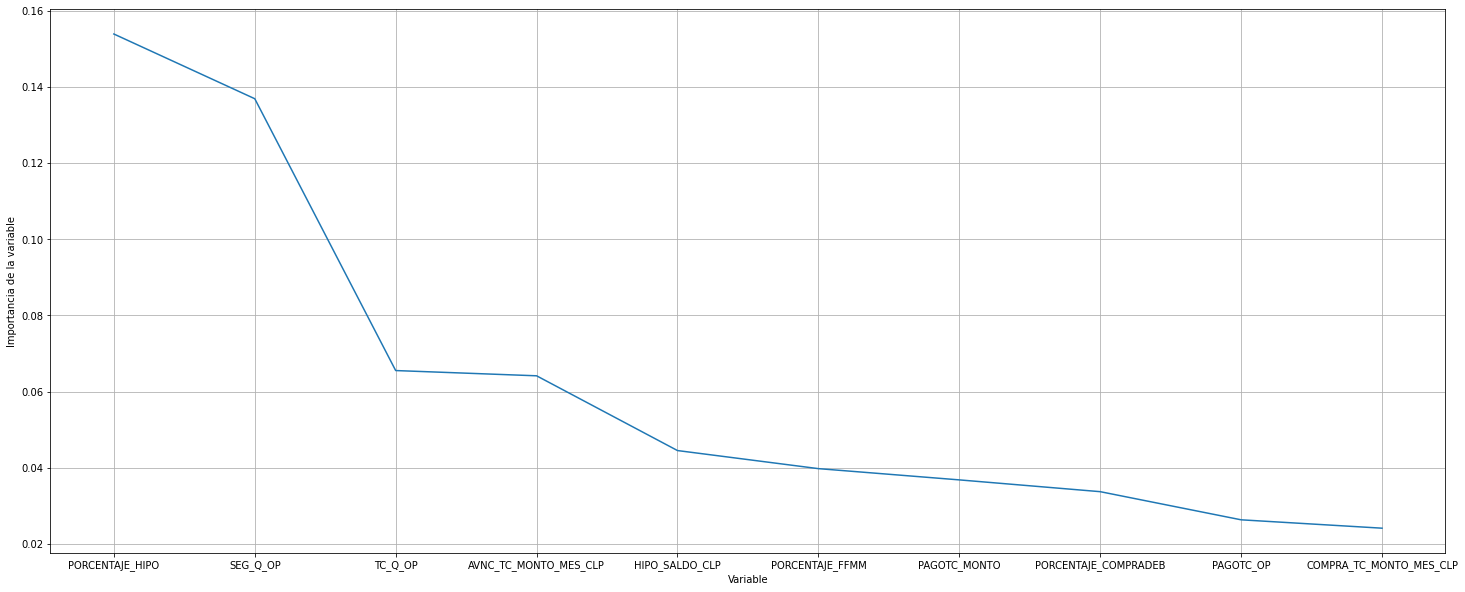

In [ ]:
plt.figure(figsize=(25,10))
plt.plot(df_importante.columns,valor_variables)
plt.grid()
plt.ylabel('Importancia de la variable')
plt.xlabel('Variable')
plt.show()

In [ ]:
pd.DataFrame(RF_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_class_weight,param_max_depth,param_max_features,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,375.774608,5.750744,3.042554,0.054347,True,balanced,8,sqrt,1,"{'bootstrap': True, 'class_weight': 'balanced'...",0.056888,0.056338,0.057053,0.056196,0.057664,0.056828,0.000528,7
1,232.095714,13.528271,2.942716,0.016093,True,balanced,8,log2,1,"{'bootstrap': True, 'class_weight': 'balanced'...",0.053998,0.054336,0.054081,0.053779,0.054479,0.054135,0.000248,8
2,360.562282,6.410177,3.208082,0.047176,True,balanced,9,sqrt,1,"{'bootstrap': True, 'class_weight': 'balanced'...",0.060745,0.061268,0.059434,0.061151,0.061833,0.060886,0.000805,4
3,246.066657,3.795225,3.134887,0.021497,True,balanced,9,log2,1,"{'bootstrap': True, 'class_weight': 'balanced'...",0.056854,0.056467,0.057184,0.057199,0.056443,0.056829,0.000330,6
4,399.988483,2.676012,3.387405,0.031167,True,balanced,10,sqrt,1,"{'bootstrap': True, 'class_weight': 'balanced'...",0.065016,0.063761,0.064429,0.064133,0.064927,0.064453,0.000474,2
5,279.910633,18.982324,3.266187,0.049028,True,balanced,10,log2,1,"{'bootstrap': True, 'class_weight': 'balanced'...",0.061206,0.059478,0.059952,0.060870,0.060939,0.060489,0.000659,5
6,473.539654,2.107068,3.378971,0.028390,True,balanced,11,sqrt,1,"{'bootstrap': True, 'class_weight': 'balanced'...",0.068386,0.068014,0.068489,0.069065,0.068727,0.068536,0.000350,1
7,324.335502,0.696447,3.296061,0.033013,True,balanced,11,log2,1,"{'bootstrap': True, 'class_weight': 'balanced'...",0.064748,0.063894,0.063307,0.064517,0.065079,0.064309,0.000633,3


Entrenamos con todos los datos

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer,StandardScaler
np.random.seed(1)
X=df.drop(columns=['flag_aumento','Unnamed: 0','Periodo']).values
y=df['flag_aumento'].values
scaler=PowerTransformer()
X=scaler.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y), y=y)
# A dictionary object containing key-value pairs of both classes and # their weights
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
model=DecisionTreeClassifier()
param_grid={'max_depth':[i for i in range(10,80,5)],'random_state':[1],'max_features':['auto'],'class_weight':[class_weights_dict]}
LR_cv=GridSearchCV(model,param_grid,verbose=2,scoring='precision')
LR_cv.fit(X,y)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] END class_weight={0: 0.5111597286616328, 1: 22.901978361669244}, max_depth=10, max_features=auto, random_state=1; total time=  14.2s
[CV] END class_weight={0: 0.5111597286616328, 1: 22.901978361669244}, max_depth=10, max_features=auto, random_state=1; total time=  13.4s
[CV] END class_weight={0: 0.5111597286616328, 1: 22.901978361669244}, max_depth=10, max_features=auto, random_state=1; total time=  13.9s
[CV] END class_weight={0: 0.5111597286616328, 1: 22.901978361669244}, max_depth=10, max_features=auto, random_state=1; total time=  13.0s
[CV] END class_weight={0: 0.5111597286616328, 1: 22.901978361669244}, max_depth=10, max_features=auto, random_state=1; total time=  12.3s
[CV] END class_weight={0: 0.5111597286616328, 1: 22.901978361669244}, max_depth=15, max_features=auto, random_state=1; total time=  15.7s
[CV] END class_weight={0: 0.5111597286616328, 1: 22.901978361669244}, max_depth=15, max_features=auto, random_s

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [{0: 0.5111597286616328,
                                           1: 22.901978361669244}],
                         'max_depth': [10, 15, 20, 25, 30, 35, 40, 45, 50, 55,
                                       60, 65, 70, 75],
                         'max_features': ['auto'], 'random_state': [1]},
             scoring='precision', verbose=2)

In [ ]:
LR_cv.best_params_

{'class_weight': {0: 0.5111597286616328, 1: 22.901978361669244},
 'max_depth': 20,
 'max_features': 'auto',
 'random_state': 1}

In [ ]:
import pickle
pickle.dump(LR_cv.best_estimator_,open('/content/drive/My Drive/Desafío Itaú/ML_model_final.sav', 'wb'))

In [ ]:
import pickle
model=pickle.load(open('/content/drive/My Drive/Desafío Itaú/ML_model.sav', 'rb'))

In [ ]:
df_values=df.groupby('id').mean()

In [ ]:
df_values

,COMPRAS_MONTO,COMPRAS_OP,DEPOSITO_MONTO,DEPOSITO_OP,GIROCAJA_MONTO,GIROCAJA_OP,CHEQUE_MONTO,CHEQUE_OP,PAGOCUENTAS_MONTO,PAGOCUENTAS_OP,...,PORCENTAJE_COMPRATC,PORCENTAJE_CVISTA,202202,202203,202204,202205,202206,202207,202208,202209
id,,,,,,,,,,,,,,,,,,,,,
1,1151.126948,24.285714,2147.727273,3.857143,0.0,0.0,953.070942,3.428571,275.722890,5.714286,...,0.000000,0.0,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.0
2,0.000000,0.000000,226.648701,0.571429,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,50.876623,0.0,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.0
4,0.000000,0.000000,0.000000,0.000000,0.0,0.0,25.202922,0.285714,627.018506,3.142857,...,0.000000,0.0,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.0
5,888.700812,29.714286,0.000000,0.000000,0.0,0.0,419.677435,0.142857,31.793182,1.000000,...,13791.735446,0.0,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.0
6,67.904221,5.714286,0.000000,0.000000,0.0,0.0,0.000000,0.000000,27.163149,0.571429,...,5469.249544,0.0,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231951,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
231952,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
231953,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [ ]:
df_values['202202']=[0]*len(df_values)
df_values['202203']=[0]*len(df_values)
df_values['202204']=[0]*len(df_values)
df_values['202205']=[0]*len(df_values)
df_values['202206']=[0]*len(df_values)
df_values['202207']=[0]*len(df_values)
df_values['202208']=[0]*len(df_values)
df_values['202209']=[1]*len(df_values)

In [ ]:
df_values=df_values.reset_index()

In [ ]:
df_values=df_values.drop(columns=['Periodo','flag_aumento'])

In [ ]:
df_values=df_values.reindex(columns=df.drop(columns=['flag_aumento','Periodo']).columns)

In [ ]:
df_predict=pd.DataFrame(model.predict_proba(scaler2.transform(scaler.transform(df_values.values))))

In [ ]:
predict=df_predict.idxmax(axis=1)

In [ ]:
predict

0         0
1         0
2         0
3         1
4         0
         ..
228643    0
228644    0
228645    0
228646    0
228647    1
Length: 228648, dtype: int64

In [ ]:
df_final=pd.DataFrame(columns=['id','target'])

In [ ]:
df_final['id']=df_values['id']
df_final['target']=predict

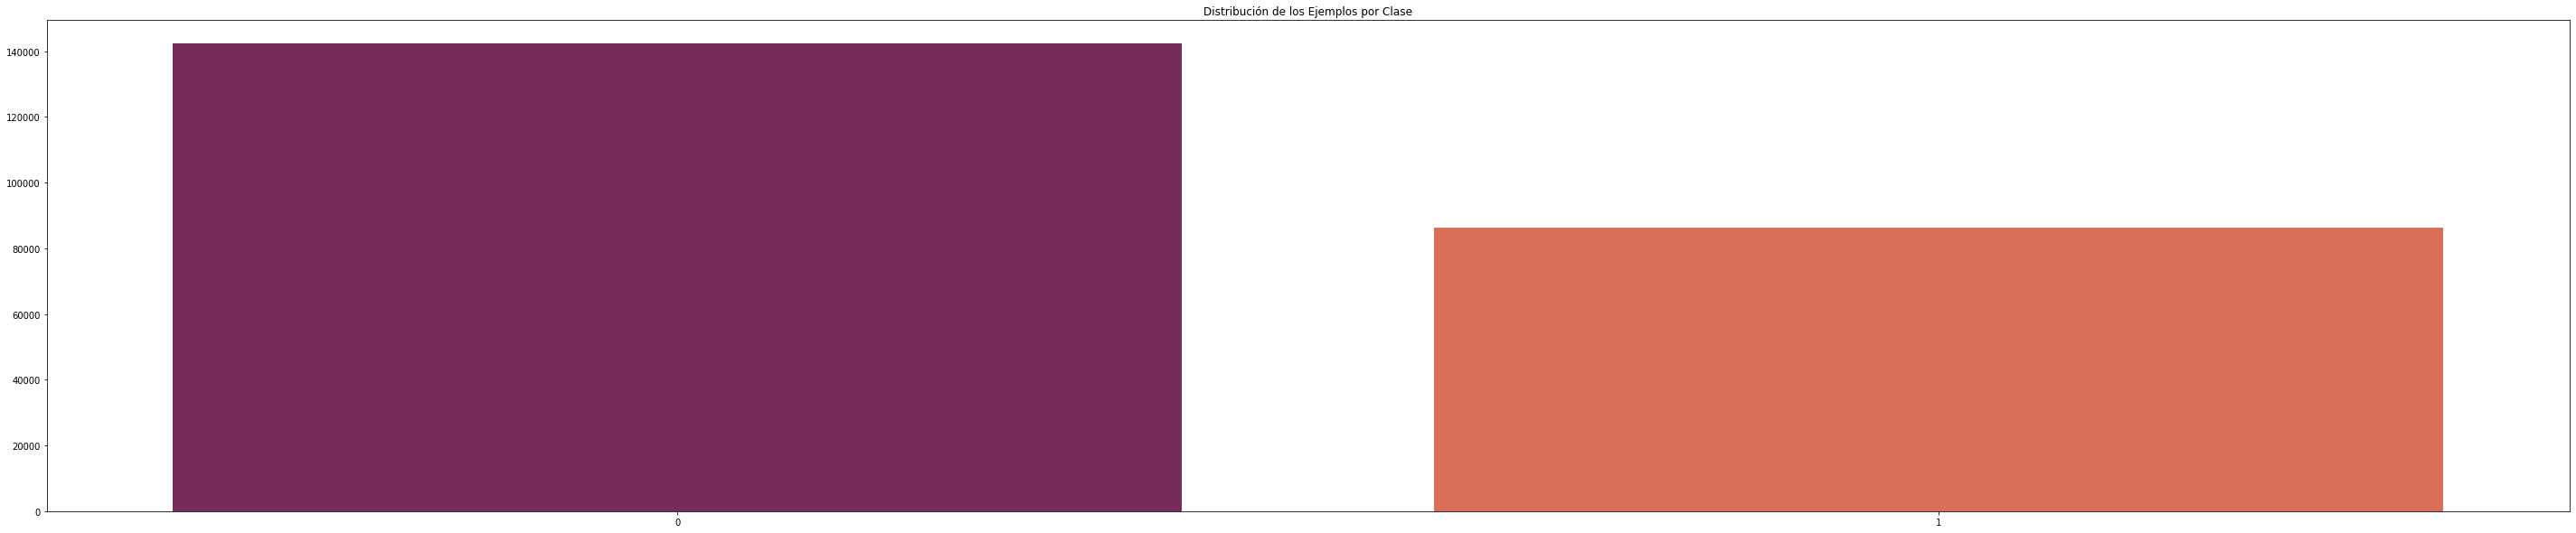

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
clases, frecuencia = np.unique(df_final['target'], return_counts=True)

fig, ax = plt.subplots(figsize=(50,10),nrows=1)
p = sns.barplot(x=clases, y=frecuencia, palette="rocket",ax=ax)
ax.set_title('Distribución de los Ejemplos por Clase')
plt.show()

In [ ]:
df_final[df_final['target']==1]['target'].count()

7240

In [ ]:
df_final.to_csv("/content/drive/My Drive/Desafío Itaú/df_final_ML_alldata_2.csv",index=False)